In [ ]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#!pip install pydantic-settings

In [ ]:
# from pydantic_settings import BaseSettings
#from pandas_profiling import ProfileReport

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor
import xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV, RFE, RFECV

ImportError: cannot import name 'RFE' from 'sklearn.model_selection' (/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/__init__.py)

In [ ]:
#!pip install sweetviz
#import sweetviz as sw

In [ ]:
import lightgbm

In [ ]:
cal=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
#my_report=sw.analyze(cal,target_feat='median_house_value')
#my_report.show_notebook()

In [ ]:
#my_report.show_html(filepath='/content/sample_data/housing.html')

In [ ]:
cal.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
missings=dict(cal.isna().mean())
perc_95=dict(cal.quantile(.95))
z=cal.describe()
z.loc['missings']=missings
z.loc['perc_95']=perc_95
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
missings,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perc_95,-117.070000,38.960000,52.000000,6269.050000,1283.000000,3297.050000,1172.100000,7.364470,495500.000000


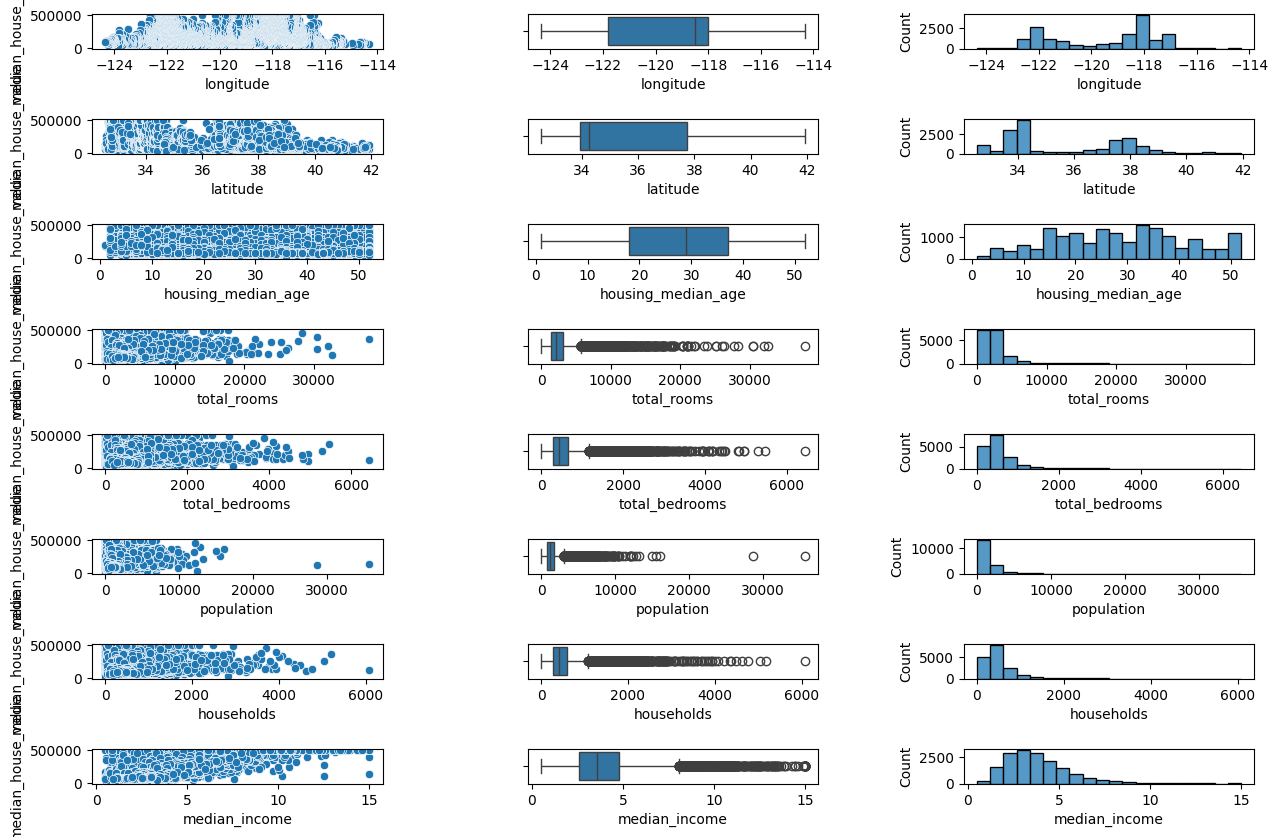

In [ ]:
vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income']
fig, ax =plt.subplots(8,3,figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=2)
for i in range(0,len(vars)):
    #ax[i,0].scatter(data=cal,x=vars[i],y='median_house_value')
    #plt.figure(size=(8,10))
    sns.scatterplot(data=cal,x=vars[i],y='median_house_value',ax=ax[i,0])
    sns.boxplot(data=cal,x=vars[i],ax=ax[i,1])
    sns.histplot(data=cal,x=vars[i],bins=20, ax=ax[i,2])
    #for j in range(3):
        #ax[i, j].figure.set_size_inches(10,10)
plt.show();


<Axes: >

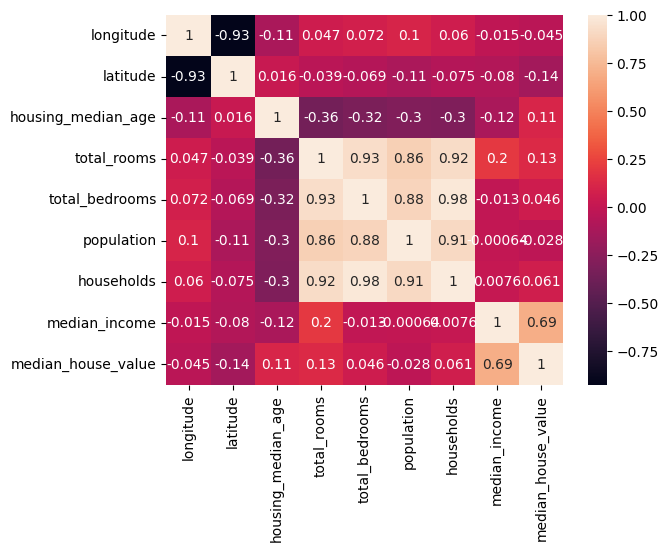

In [ ]:
sns.heatmap(cal.corr(),annot=True)

<Axes: xlabel='median_house_value', ylabel='Count'>

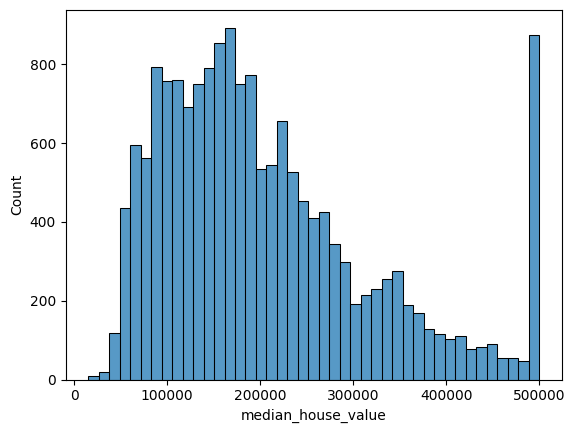

In [ ]:
sns.histplot(cal['median_house_value'])

In [ ]:
# Some variables are correlated check vif and try regularization
# Some have outliers, cap at p95 or use WOE

In [ ]:
for i in vars:
  cal[i]=cal[i].fillna(cal[i].mode())
  # Mean for numercial

In [ ]:
# Simplified Model
X_train,X_test,y_train,y_test=train_test_split(cal[vars],cal['median_house_value'],test_size=0.33,random_state=123)

#y_train=np.log(y_train)
#y_test=np.log(y_test)
from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# X_train=pd.DataFrame(scaler.fit_transform(X_train))
# X_train.columns=vars
# X_test=pd.DataFrame(scaler.transform(X_test))
# X_test.columns=vars

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
r2_score(y_train,linreg.predict(X_train))
r2_score(y_test,linreg.predict(X_test))
mean_squared_error(y_train,linreg.predict(X_train))
mean_squared_error(y_test,linreg.predict(X_test))

0.6452724094675715

0.631059701020134

4754292062.642495

4999296485.9111

In [ ]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
from sklearn.feature_selection import f_regression
# generating data
rng = np.random.default_rng(seed=2023) #initializing random numbers generator
pd.DataFrame({'feature':cal[vars].columns,'coeff':linreg.coef_,'p_value':f_regression(X_train,y_train)[1]})

,feature,coeff,p_value
0,longitude,-43862.70846568,0.00002846
1,latitude,-43948.40624049,0.00000000
2,housing_median_age,1178.33099893,0.00000000
3,total_rooms,-7.30820353,0.00000000
4,total_bedrooms,111.75500586,0.00000008
5,population,-45.04707543,0.00860727
6,households,61.47827827,0.00000000
7,median_income,40257.89527257,0.00000000


In [ ]:
y_train

13734   411200.00000000
1776    496400.00000000
5540    120000.00000000
16151   209500.00000000
11227   100000.00000000
              ...      
96       87500.00000000
13435   142100.00000000
7763    500001.00000000
15377   293200.00000000
15725   412500.00000000
Name: median_house_value, Length: 11390, dtype: float64

In [ ]:
import statsmodels.api as sm
from scipy import stats

# generating data
rng = np.random.default_rng(seed=2023) #initializing random numbers generator
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2588.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:09:14   Log-Likelihood:            -1.4306e+05
No. Observations:               11390   AIC:                         2.861e+05
Df Residuals:                   11381   BIC:                         2.862e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.669e+06   8.45

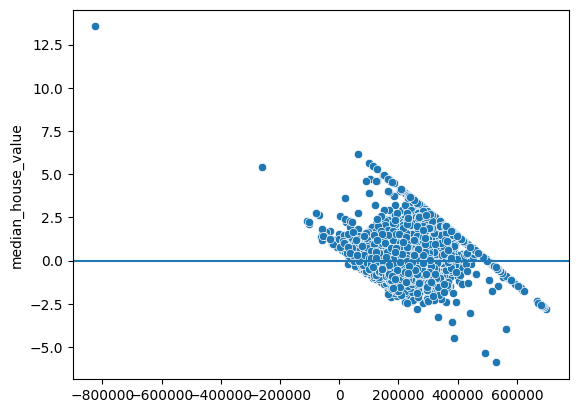

In [ ]:
# Check for linearity and constant variance
residual=y_test -linreg.predict(X_test)
std_residuals= residual/np.std(residual)

sns.scatterplot(x=linreg.predict(X_test),y=std_residuals)
plt.axhline(y=0)
plt.show();

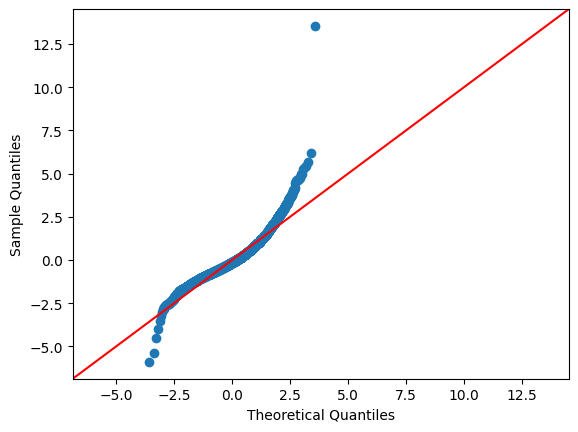

In [ ]:
import statsmodels.api as sm
sm.qqplot(std_residuals,line='45')
plt.show();

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
est=LinearRegression()
rfe=RFE(est,n_features_to_select =1,step=1)
rfecv=RFECV(est,cv=3,step=1)
rfe.fit(X_train,y_train)
rfecv.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

RFECV(cv=3, estimator=LinearRegression())

In [ ]:
pd.DataFrame({'features':X_train.columns,
              'rfe_Support':rfe.support_,
               'rfe_ranking':rfe.ranking_})

,features,rfe_Support,rfe_ranking
0,longitude,True,1
1,latitude,False,2
2,housing_median_age,False,4
3,total_rooms,False,8
4,total_bedrooms,False,5
5,population,False,7
6,households,False,6
7,median_income,False,3


In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
import statsmodels.api as sm
#vars2=vars.remove('housing_median_age')
X2=sm.add_constant(X_train[vars])
result= sm.OLS(y_train.values,X2)
result2=result.fit()
print(result2.summary2())

                            Results: Ordinary least squares
Model:                     OLS                    Adj. R-squared:           0.645      
Dependent Variable:        y                      AIC:                      286136.9721
Date:                      2024-03-17 01:09       BIC:                      286203.0366
No. Observations:          11390                  Log-Likelihood:           -1.4306e+05
Df Model:                  8                      F-statistic:              2588.      
Df Residuals:              11381                  Prob (F-statistic):       0.00       
R-squared:                 0.645                  Scale:                    4.7581e+09 
---------------------------------------------------------------------------------------
                       Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------------
const              -3668752.9855 84466.4536 -43.4344 0.0000 

In [ ]:
X2_test=sm.add_constant(X_test[vars])
r2_score(y_train,result2.predict(X2))
r2_score(y_test,result2.predict(X2_test))
mean_squared_error(y_train,result2.predict(X2))
mean_squared_error(y_test,result2.predict(X2_test))

0.6452724094675714

0.6310597010201245

4754292062.642496

4999296485.911228

In [ ]:
rfecv.cv_results_

{'mean_test_score': array([0.00132111, 0.24729826, 0.58672463, 0.59705479, 0.60610572,
        0.61050364, 0.64275064, 0.64422019]),
 'std_test_score': array([0.00088878, 0.00472446, 0.02080794, 0.0191646 , 0.01917881,
        0.01985182, 0.01761479, 0.0180603 ]),
 'split0_test_score': array([6.50869974e-05, 2.42151809e-01, 5.84505511e-01, 5.93680567e-01,
        6.01345774e-01, 6.06039917e-01, 6.36157038e-01, 6.37883099e-01]),
 'split1_test_score': array([0.00199032, 0.24618145, 0.56242233, 0.57545277, 0.58536108,
        0.58873137, 0.62524325, 0.62596112]),
 'split2_test_score': array([0.00190792, 0.25356152, 0.61324604, 0.62203104, 0.6316103 ,
        0.63673964, 0.66685164, 0.66881635])}

In [ ]:
vars=list(cal.columns)
vars.remove('median_house_value')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cal[vars],cal['median_house_value'],test_size=0.33,random_state=123)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
est=LGBMRegressor(n_estimators=100,verbose=0)
rfecv=RFECV(est,step=1,cv=3)
rfecv.fit(X_train,y_train)

RFECV(cv=3, estimator=LGBMRegressor(verbose=0))

In [ ]:
rfecv.n_features_

8

In [ ]:
#!pip install tabgan==1.3.3

In [ ]:
#!pip install --upgrade lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgbr = LGBMRegressor()

lgbr.fit(
    X=X_train,
    y=y_train,
    eval_set=(X_test, y_test),
    eval_metric="mse",
    callbacks=[lgb.callback.early_stopping(3, verbose=0)],
)

y_pred = lgbr.predict(X_train)
y_pred_test = lgbr.predict(X_test)

print(f"R2 score (train): {r2_score(y_train, y_pred)}")
print(f"R2 score (test): {r2_score(y_test, y_pred_test)}")
print(f"MSE (train): {mean_squared_error(y_train, y_pred)}")
print(f"MSE (test): {mean_squared_error(y_test, y_pred_test)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 11390, number of used features: 8
[LightGBM] [Info] Start training from score 207193.602371


LGBMRegressor()

R2 score (train): 0.8865062576443566
R2 score (test): 0.8243054904970374
MSE (train): 1521117648.7037315
MSE (test): 2380734623.9505515


In [ ]:
#!pip install scikit-learn==1.2.2

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

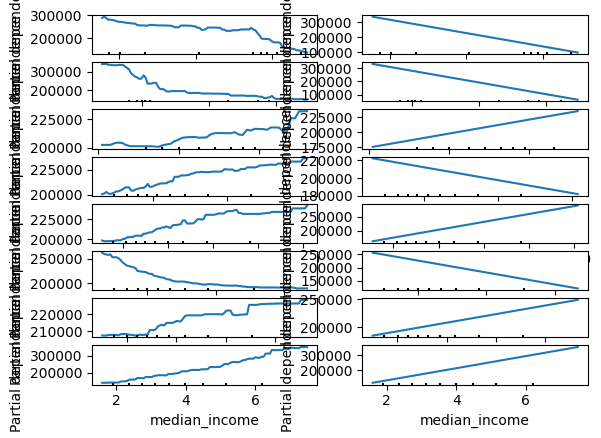

In [ ]:
fig,ax=plt.subplots(8,2)
for i in range(len(vars)):
  PartialDependenceDisplay.from_estimator(lgbr,X_test,features=[i],kind='average',ax=ax[i,0])
  PartialDependenceDisplay.from_estimator(linreg,X_test,features=[i],kind='average',ax=ax[i,1])
plt.show();

In [ ]:
#!pip install shap
import shap

In [ ]:
explainer=shap.TreeExplainer(lgbr)
shap_values=explainer.shap_values(X_test)

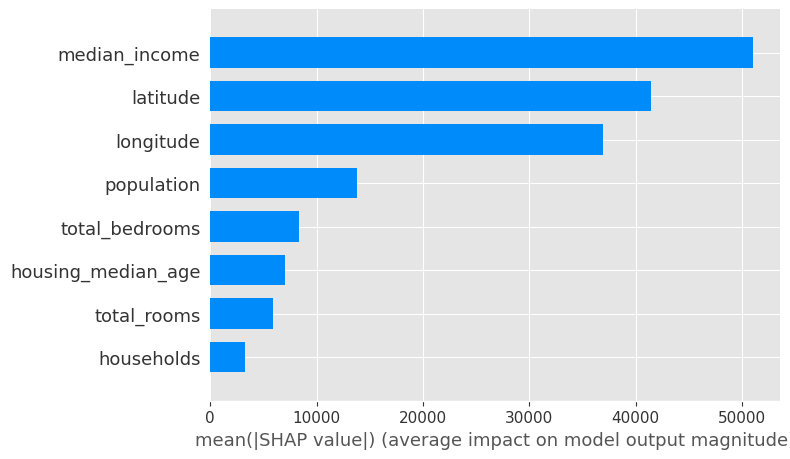

In [ ]:
plt.style.use('ggplot')
shap.summary_plot(shap_values,X_test,plot_type='bar')

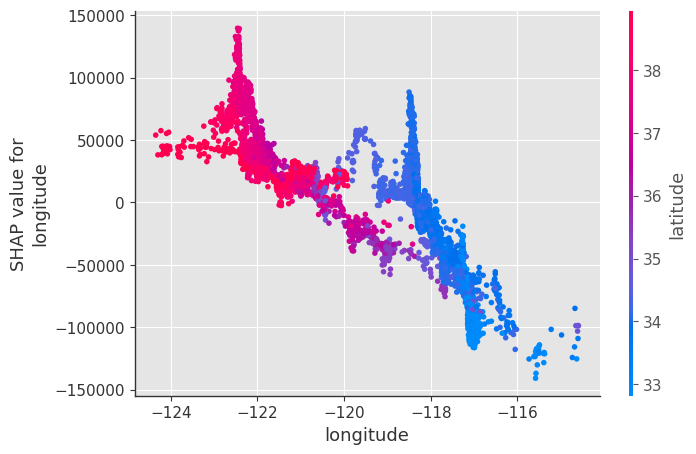

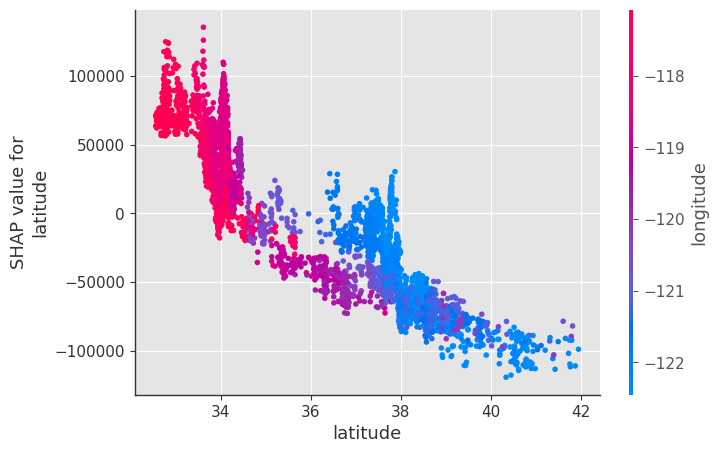

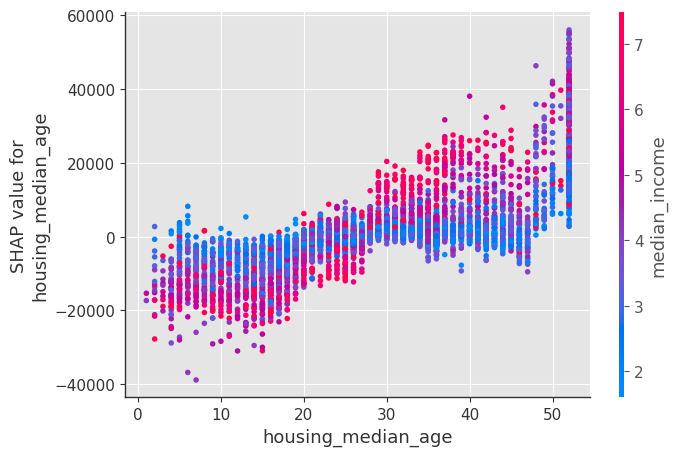

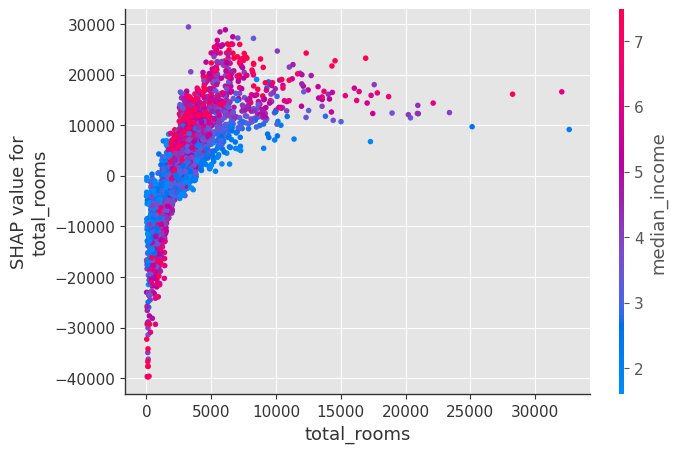

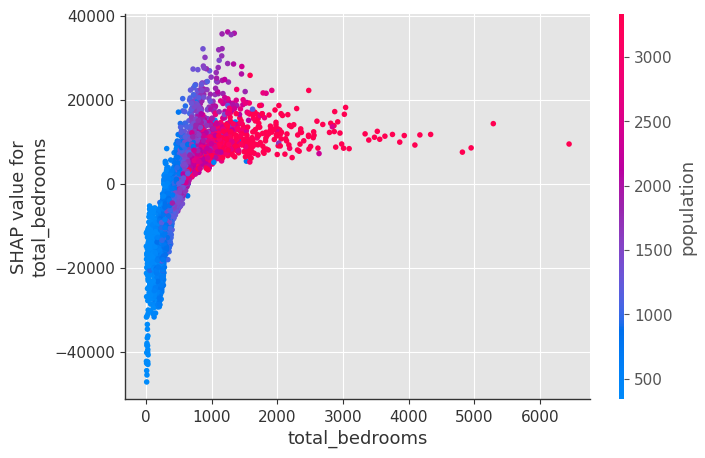

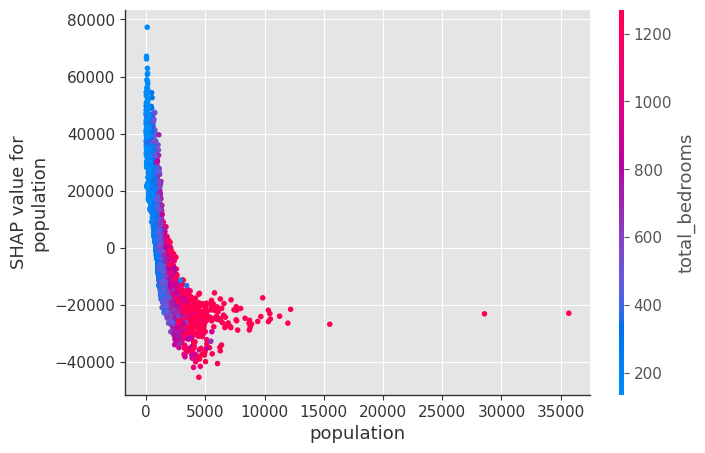

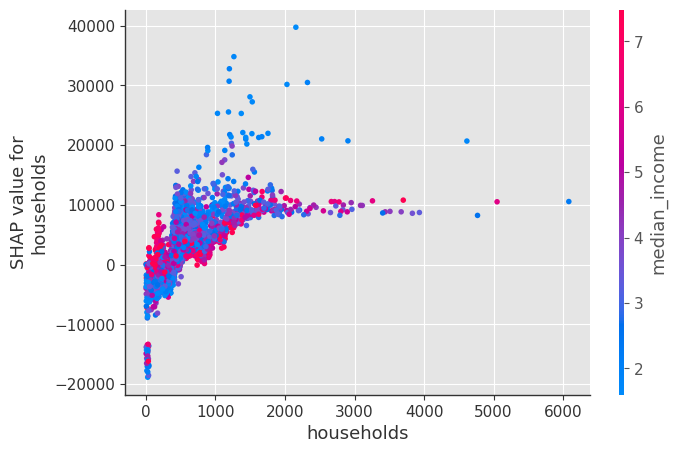

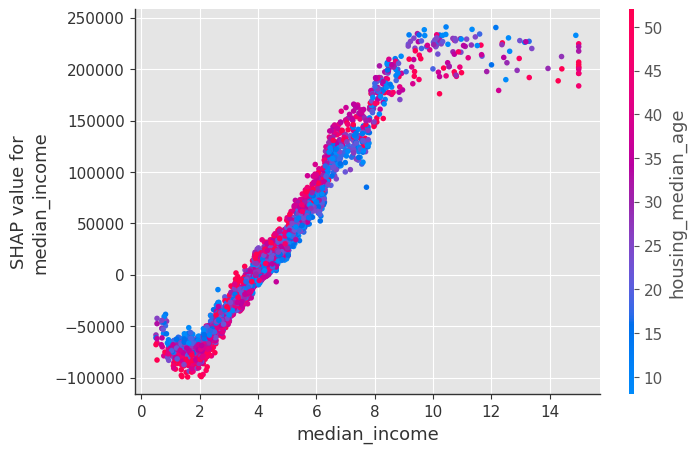

In [ ]:
for i in range(len(vars)):
   shap.dependence_plot(i,shap_values,X_test)

In [ ]:
cal_valid=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
cal_valid

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05000000,37.37000000,27.00000000,3885.00000000,661.00000000,1537.00000000,606.00000000,6.60850000,344700.00000000
1,-118.30000000,34.26000000,43.00000000,1510.00000000,310.00000000,809.00000000,277.00000000,3.59900000,176500.00000000
2,-117.81000000,33.78000000,27.00000000,3589.00000000,507.00000000,1484.00000000,495.00000000,5.79340000,270500.00000000
3,-118.36000000,33.82000000,28.00000000,67.00000000,15.00000000,49.00000000,11.00000000,6.13590000,330000.00000000
4,-119.67000000,36.33000000,19.00000000,1241.00000000,244.00000000,850.00000000,237.00000000,2.93750000,81700.00000000
...,...,...,...,...,...,...,...,...,...
2995,-119.86000000,34.42000000,23.00000000,1450.00000000,642.00000000,1258.00000000,607.00000000,1.17900000,225000.00000000
2996,-118.14000000,34.06000000,27.00000000,5257.00000000,1082.00000000,3496.00000000,1036.00000000,3.39060000,237200.00000000
2997,-119.70000000,36.30000000,10.00000000,956.00000000,201.00000000,693.00000000,220.00000000,2.28950000,62000.00000000
2998,-117.12000000,34.10000000,40.00000000,96.00000000,14.00000000,46.00000000,14.00000000,3.27080000,162500.00000000


In [ ]:
r2_score(cal_valid['median_house_value'],linreg.predict(cal_valid[vars]))
#r2_score(cal_valid['median_house_value'],linreg.predict(cal_valid[vars]))
mean_squared_error(cal_valid['median_house_value'],linreg.predict(cal_valid[vars]))
#mean_squared_error(cal_valid['median_house_value'],linreg.predict(cal_valid[vars]))

0.6185461119605655

4879481211.300538

In [ ]:
r2_score(cal_valid['median_house_value'],lgbr.predict(cal_valid[vars]))
#r2_score(cal_valid['median_house_value'],lgbr.predict(cal_valid[vars]))
mean_squared_error(cal_valid['median_house_value'],lgbr.predict(cal_valid[vars]))
#mean_squared_error(cal_valid['median_house_value'],lgbr.predict(cal_valid[vars]))

0.8094912212463365

2436949879.5624075

In [ ]:
cal_valid.shape

(3000, 9)

In [ ]:
# Shap values for logistic regresion